<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/Endterm_2024Nov24_PartI_aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data for this project is Individual Assistance (IA) provided by the Federal Emergency Management Agency (FEMA) to individuals and families who have sustained losses due to disasters. It is intended to meet basic needs and supplement disaster recovery efforts. Homeowners, renters, and business owners in designated counties who sustained damage to their homes, vehicles, personal property, businesses, or inventory resulting from a federally declared disaster may apply for disaster assistance. The Large Disasters dataset contains a curated set of disasters for which individuals applied for Individual Assistance. This dataset only contains some of the largest disasters.

The data can be used to analyze FEMA's IA program response attributes. This could particularly help local and state governments and non-governmental organizations administer applications for funding from the Housing and Urban Development's (HUD) Community Development Block Grants (CDBG) program for rebuilding efforts during and after major disaster declarations. This data was instrumental in Hurricane Sandy community rebuilding during the costliest hurricane season of 2017.

Datalink: https://www.fema.gov/about/reports-and-data/openfema/IndividualAssistanceHousingRegistrantsLargeDisasters.csv
Google slides slide:https://docs.google.com/presentation/d/1ULP6ox7LowIqYLABiGXmjunB6IoM-Q_m/edit#slide=id.p1
Report: https://docs.google.com/document/d/1lQ88IjzLxvvAPDF3YrIGX78h7_Fw4v0G/edit



Kmeans cluster: We are clustering cities based on disaster characteristics, impacts, socioeconomic factors, and housing situations. This reveals groupings of how cities gauge vulnerability profiles.

In [ ]:
#name file
fname = "https://www.fema.gov/about/reports-and-data/openfema/IndividualAssistanceHousingRegistrantsLargeDisasters.csv"

In [ ]:
#create file with select features
city = pd.read_csv(fname, usecols=['disasterNumber', 'ppfvl', 'damagedCity',
                                  'damagedZipCode', 'householdComposition',
                                  'grossIncome', 'specialNeeds', 'ownRent',
                                  'residenceType', 'homeOwnersInsurance',
                                  'floodInsurance', 'habitabilityRepairsRequired',
                                  'destroyed', 'waterLevel', 'floodDamage',
                                  'foundationDamage', 'roofDamage',
                                  'roofDamageAmount', 'rentalAssistanceAmount',
                                  'repairAmount', 'replacementAmount',
                                  'renterDamageLevel', 'primaryResidence',
                                  'censusBlockId', 'censusYear', 'id'])

In [ ]:
#show data
city.head ()

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,...,roofDamageAmount,rentalAssistanceAmount,repairAmount,replacementAmount,renterDamageLevel,primaryResidence,ppfvl,censusBlockId,id,censusYear
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.820143e+14,d214ed1e-951e-484b-b014-2a885a7ea234,2010.0
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.211500e+14,e7b10c4f-adec-4a58-a4fc-85b5a20dfa4c,2010.0
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.00,1.209704e+14,0832cc95-c445-4429-956c-e2d1864d37ac,2010.0
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,199.99,7.201330e+14,63bc856a-5cfa-44c8-96e1-f1866735cf94,2010.0
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.201900e+14,ce6f1140-3777-41d8-8da0-f7f4891b2228,2020.0


PPFVL stands for Personal Property Verified Loss in FEMA's Individuals and Households Program (IHP). It's a decimal value that represents the FEMA-determined amount of damage to personal property caused by a disaster. This can include damage to furniture, appliances, and other personal items.

In [ ]:
#show rows and columns
city.shape

(6367334, 26)

In [ ]:
#show data type
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367334 entries, 0 to 6367333
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   disasterNumber               int64  
 1   damagedCity                  object 
 2   damagedZipCode               float64
 3   householdComposition         int64  
 4   grossIncome                  float64
 5   specialNeeds                 int64  
 6   ownRent                      object 
 7   residenceType                object 
 8   homeOwnersInsurance          int64  
 9   floodInsurance               int64  
 10  habitabilityRepairsRequired  float64
 11  destroyed                    int64  
 12  waterLevel                   float64
 13  floodDamage                  int64  
 14  foundationDamage             int64  
 15  roofDamage                   int64  
 16  roofDamageAmount             float64
 17  rentalAssistanceAmount       float64
 18  repairAmount                 float64
 19  

In [ ]:
#how nan values
city.isna().sum()

,0
disasterNumber,0
damagedCity,32
damagedZipCode,15
householdComposition,0
grossIncome,1169713
specialNeeds,0
ownRent,0
residenceType,0
homeOwnersInsurance,0
floodInsurance,0


There are multiple colums which have nan values which will need to be processes

In [ ]:
#descriptive stats for dataframe
describe = city.describe().T
zero_val_cnt = (city == 0).sum()
describe['zero_val %'] = (zero_val_cnt / city.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / city.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,25%,50%,75%,max,zero_val %,missing %
disasterNumber,6367334.000,4398.284,108.791,4332.000,4337.000,4337.000,4393.000,4611.000,0.000,0.000
damagedZipCode,6367319.000,42629.335,26935.033,0.000,32460.000,33613.000,70663.000,99999.000,0.004,0.000
householdComposition,6367334.000,2.256,1.458,1.000,1.000,2.000,3.000,99.000,0.000,0.000
grossIncome,5197621.000,59137.306,615993.719,0.000,13000.000,25752.000,48250.000,99999999.000,1.409,18.371
specialNeeds,6367334.000,0.034,0.181,0.000,0.000,0.000,0.000,1.000,96.614,0.000
homeOwnersInsurance,6367334.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000,70.077,0.000
floodInsurance,6367334.000,0.098,0.297,0.000,0.000,0.000,0.000,1.000,90.217,0.000
habitabilityRepairsRequired,2275825.000,0.384,0.486,0.000,0.000,0.000,1.000,1.000,22.026,64.258
destroyed,6367334.000,0.002,0.042,0.000,0.000,0.000,0.000,1.000,99.820,0.000
waterLevel,3114662.000,1.715,7.766,0.000,0.000,0.000,0.000,660.000,43.228,51.084


Many columns consist of numeric data (e.g., grossIncome, repairAmount, roofDamageAmount), but their scales vary significantly. For instance:
grossIncome has values ranging from 0 to 99,999,999 with a huge standard deviation (615,993.719), indicating the presence of outliers.
foundationDamageAmount and roofDamageAmount have much smaller scales compared to income or disaster-related amounts.


Many columns are binary, meaning they take only values 0 or 1, such as:
specialNeeds, homeOwnersInsurance, floodInsurance, inspected, etc.
Zero Val Percentage:
Columns like specialNeeds (96.614%), floodInsurance (90.217%), and homeOwnersInsurance (70.077%) have a high percentage of zero values, indicating that most of the dataset does not exhibit these attributes.
Formatting Suggestions:
These binary columns can be treated as categorical features in the analysis (0 = No, 1 = Yes). No additional transformations are necessary unless the goal is to simplify the model (e.g., removing columns with too many zeros).

grossIncome: Has a significant percentage of missing values (18.371%). You might need to handle these missing values using techniques like imputation or removal before further analysis.
rpfvl and habitabilityRepairsRequired have large amounts of missing values and require closer attention when deciding on imputation or other pre-processing strategies.

In [ ]:
#show unique values primary residence
city['primaryResidence'].unique()

array([ 1.,  0., nan])

In [ ]:
#identify number columns
city.select_dtypes("number")

,disasterNumber,damagedZipCode,householdComposition,grossIncome,specialNeeds,homeOwnersInsurance,floodInsurance,habitabilityRepairsRequired,destroyed,waterLevel,...,foundationDamage,roofDamage,roofDamageAmount,rentalAssistanceAmount,repairAmount,replacementAmount,primaryResidence,ppfvl,censusBlockId,censusYear
0,4332,77036.0,1,1800.0,1,0,0,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,1.0,NaN,4.820143e+14,2010.0
1,4337,34238.0,1,NaN,0,0,0,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,1.0,NaN,1.211500e+14,2010.0
2,4337,34758.0,1,28000.0,0,0,0,0.0,0,0.0,...,0,0,NaN,NaN,NaN,NaN,1.0,0.00,1.209704e+14,2010.0
3,4339,612.0,2,2100.0,0,0,0,0.0,0,0.0,...,0,0,NaN,NaN,NaN,NaN,1.0,199.99,7.201330e+14,2010.0
4,4559,70663.0,4,55000.0,0,0,0,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,1.0,NaN,2.201900e+14,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367329,4339,953.0,4,13000.0,0,0,0,1.0,1,0.0,...,0,0,NaN,1106.0,7516.86,25783.14,1.0,6140.81,7.213551e+14,2010.0
6367330,4339,926.0,2,56000.0,0,1,0,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,1.0,NaN,7.212701e+14,2010.0
6367331,4586,78759.0,1,35800.0,0,0,0,1.0,0,0.0,...,0,0,NaN,2424.0,NaN,NaN,1.0,357.94,4.845303e+14,2020.0
6367332,4611,70062.0,2,120000.0,0,1,1,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,1.0,NaN,2.205102e+14,2020.0


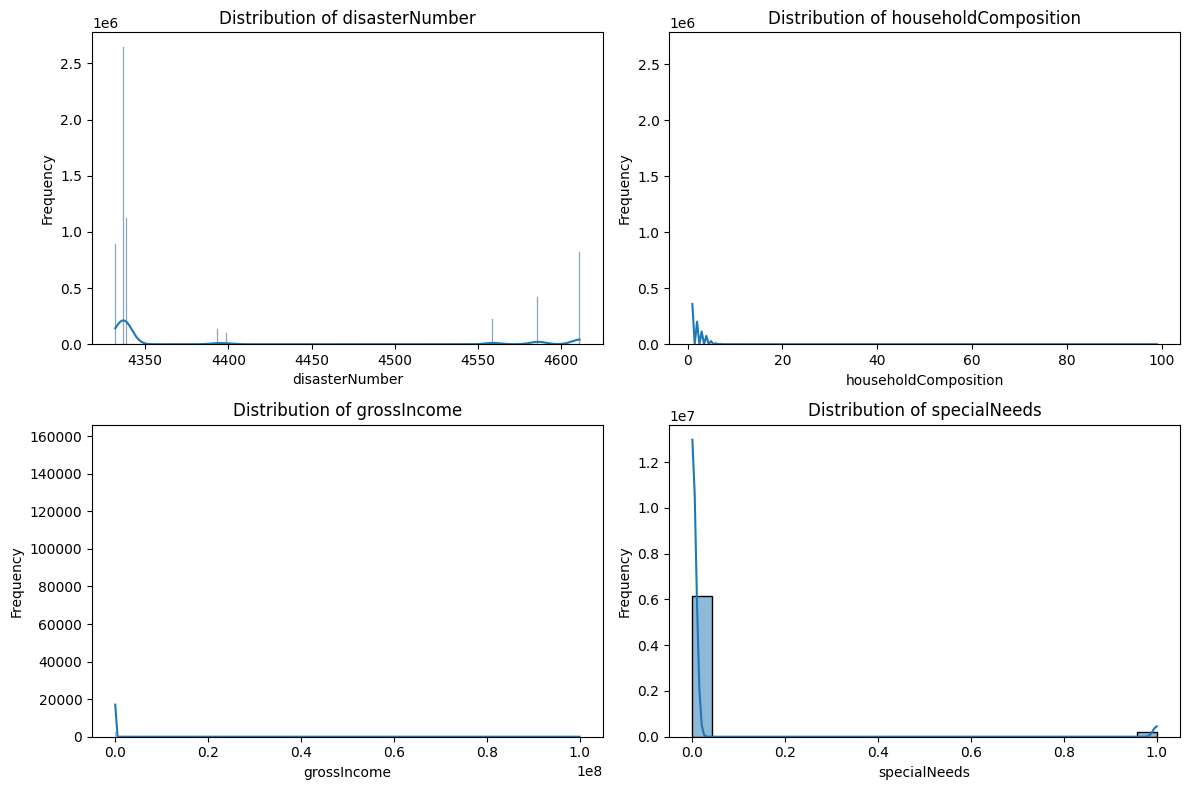

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for histograms
numerical_features = city.select_dtypes("number").columns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Adjust nrows, ncols for desired layout

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical features and plot histograms
for i, feature in enumerate(numerical_features):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        ax = axes[i]
        sns.histplot(city[feature], ax=ax, kde=True)  # Using seaborn for better visualization
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

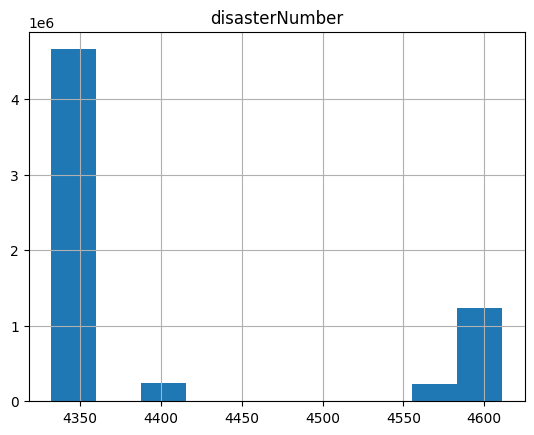

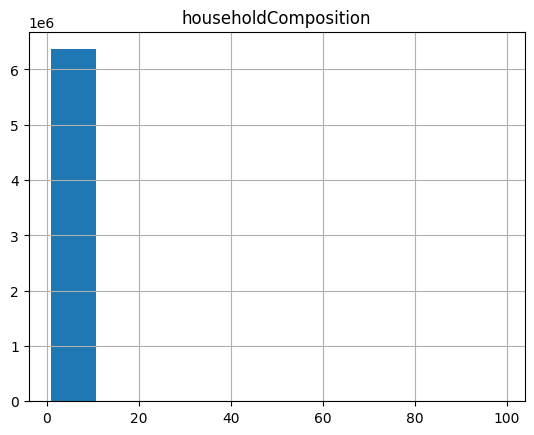

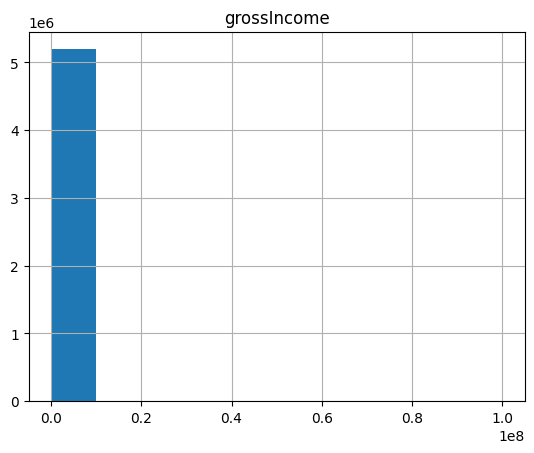

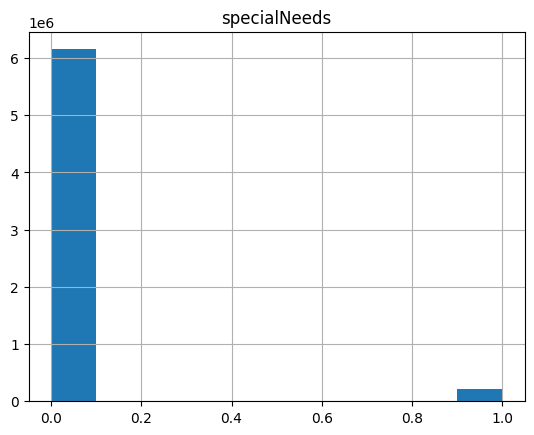

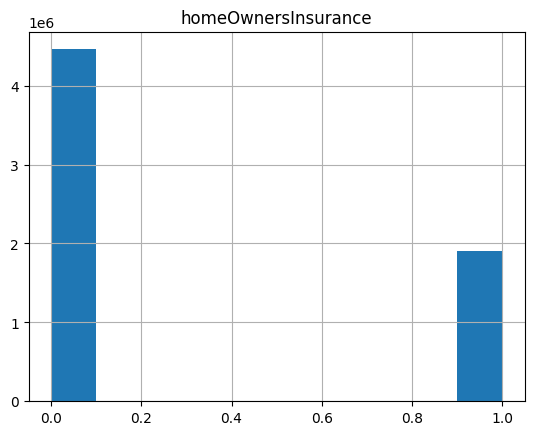

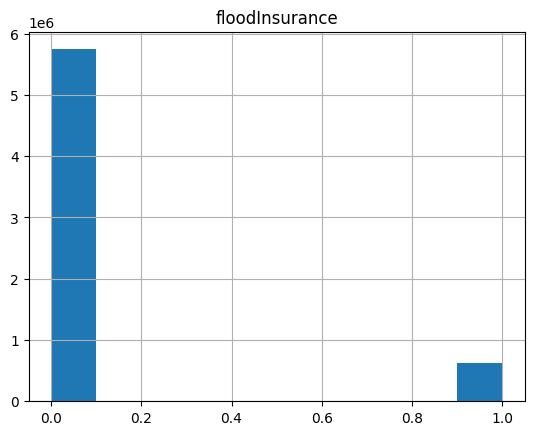

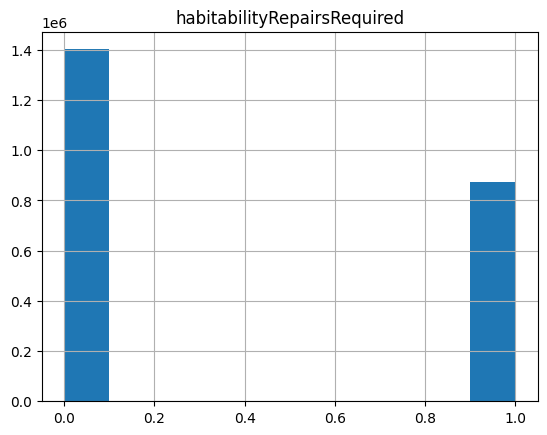

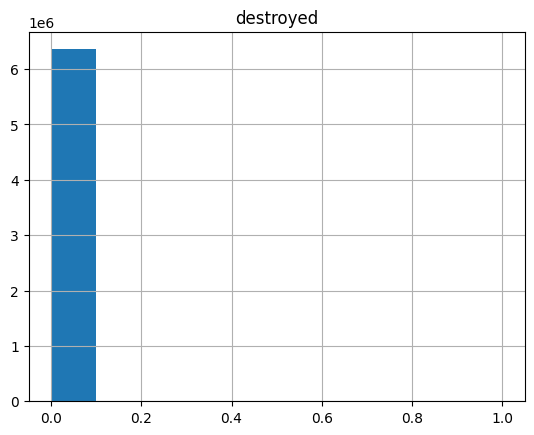

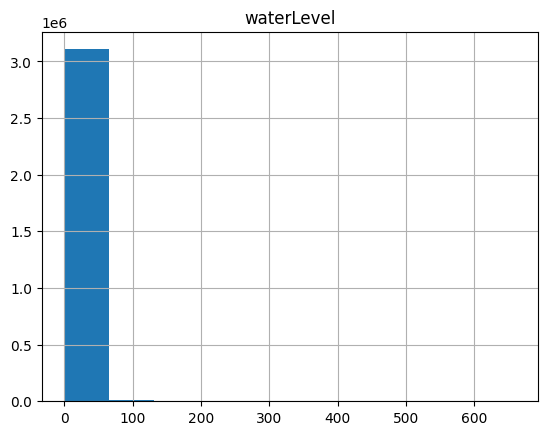

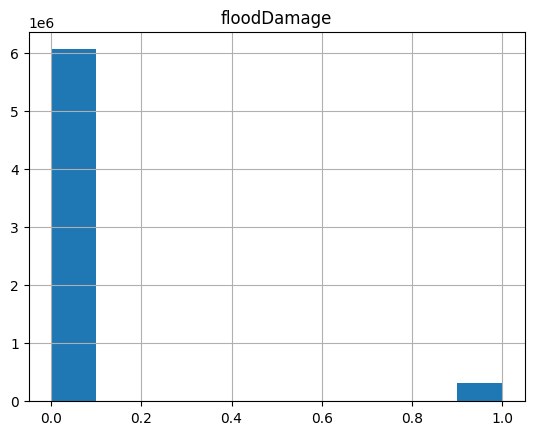

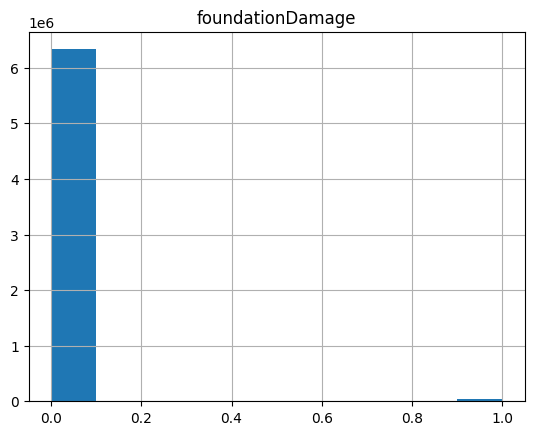

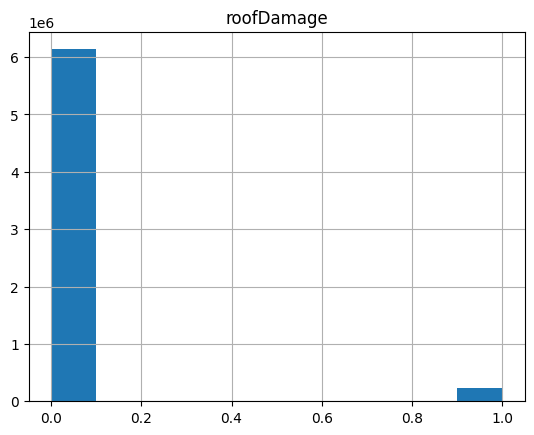

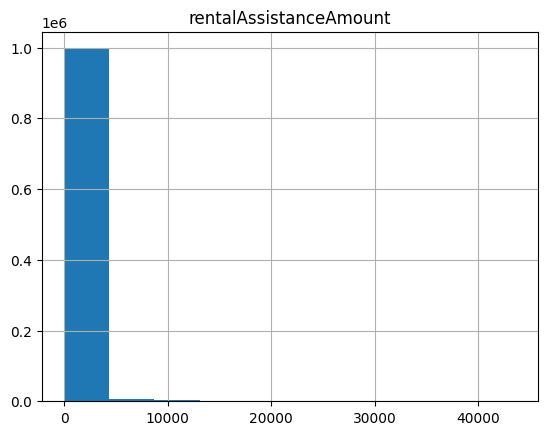

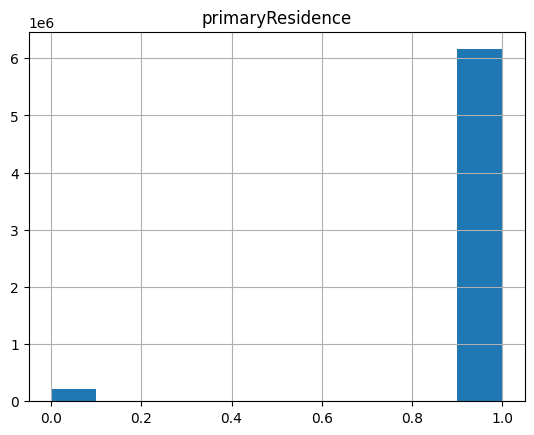

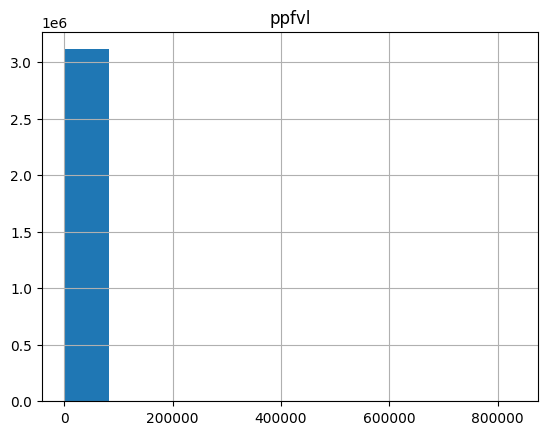

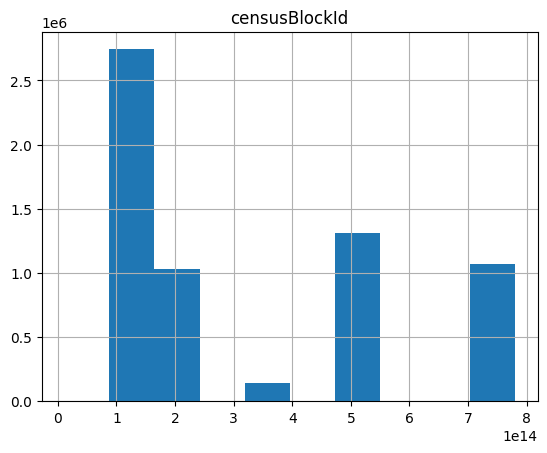

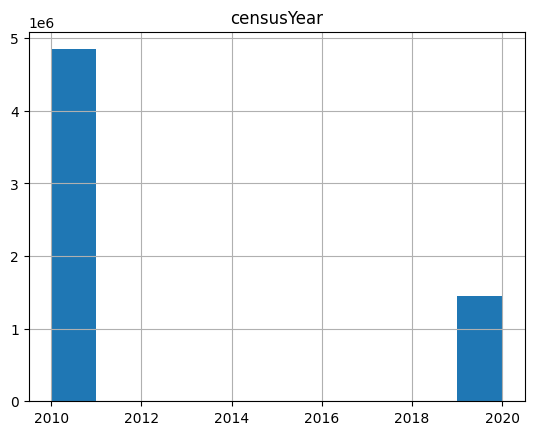

In [ ]:
# #create histogram
for c in city.select_dtypes("number").columns:
    city[[c]].hist()

The histograms reveal that many numeric features in the dataset are heavily skewed to the right (positively skewed), such as grossIncome, ownRent, rentalAssistanceAmount, and others. This signifies that most values are concentrated on the lower end of the scale, with a few extremely high values pulling the tail to the right. The distribution of destroyed feature suggests it primarily contains 0 values with a small number of 1 values. This skewness could affect the performance of some statistical models and might require transformations (e.g., logarithmic) for better analysis. Additionally, some histograms show distinct peaks or clusters, potentially indicating the presence of sub-groups within the data that might warrant further investigation.

In [ ]:
#summarize the number of rows with missing values for each column
for c in city.columns:

  # count number of rows with missing values
  n_miss = city[c].isnull().sum()
  perc = n_miss / city.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, city[c].dtype,
                                                  n_miss, perc))

disasterNumber (int64):  Missing: 0 (0.0%)
damagedCity (object):  Missing: 32 (0.0%)
damagedZipCode (float64):  Missing: 15 (0.0%)
householdComposition (int64):  Missing: 0 (0.0%)
grossIncome (float64):  Missing: 1169713 (18.4%)
specialNeeds (int64):  Missing: 0 (0.0%)
ownRent (object):  Missing: 0 (0.0%)
residenceType (object):  Missing: 0 (0.0%)
homeOwnersInsurance (int64):  Missing: 0 (0.0%)
floodInsurance (int64):  Missing: 0 (0.0%)
habitabilityRepairsRequired (float64):  Missing: 4091509 (64.3%)
destroyed (int64):  Missing: 0 (0.0%)
waterLevel (float64):  Missing: 3252672 (51.1%)
floodDamage (int64):  Missing: 0 (0.0%)
foundationDamage (int64):  Missing: 0 (0.0%)
roofDamage (int64):  Missing: 0 (0.0%)
roofDamageAmount (float64):  Missing: 6134787 (96.3%)
rentalAssistanceAmount (float64):  Missing: 5359307 (84.2%)
repairAmount (float64):  Missing: 5949589 (93.4%)
replacementAmount (float64):  Missing: 6361807 (99.9%)
renterDamageLevel (object):  Missing: 6110572 (96.0%)
primaryResi

In [ ]:
# Calculate missing percentages for all columns
missing_percentages = city.isnull().sum() / city.shape[0] * 100

# Drop columns with more than 90% missing values
columns_to_drop = missing_percentages[missing_percentages > 90].index
city.drop(columns=columns_to_drop, inplace=True)

# Print the final shape of the DataFrame
print("There are (rows, columns) = ", city.shape, "in the dataframe")

There are (rows, columns) =  (6367334, 22) in the dataframe


In [ ]:
city.head ()

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,...,waterLevel,floodDamage,foundationDamage,roofDamage,rentalAssistanceAmount,primaryResidence,ppfvl,censusBlockId,id,censusYear
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,...,NaN,0,0,0,NaN,1.0,NaN,4.820143e+14,d214ed1e-951e-484b-b014-2a885a7ea234,2010.0
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,...,NaN,0,0,0,NaN,1.0,NaN,1.211500e+14,e7b10c4f-adec-4a58-a4fc-85b5a20dfa4c,2010.0
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,...,0.0,0,0,0,NaN,1.0,0.00,1.209704e+14,0832cc95-c445-4429-956c-e2d1864d37ac,2010.0
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,...,0.0,0,0,0,NaN,1.0,199.99,7.201330e+14,63bc856a-5cfa-44c8-96e1-f1866735cf94,2010.0
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,...,NaN,0,0,0,NaN,1.0,NaN,2.201900e+14,ce6f1140-3777-41d8-8da0-f7f4891b2228,2020.0


In [ ]:
#nan values in ppfvl
city['ppfvl'].isna().sum()

3252672

In [ ]:
#show ppfvl data
city['ppfvl'].describe()

,ppfvl
count,3.114662e+06
mean,5.726650e+02
std,1.508132e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.417000e+02
max,8.326153e+05


<Axes: >

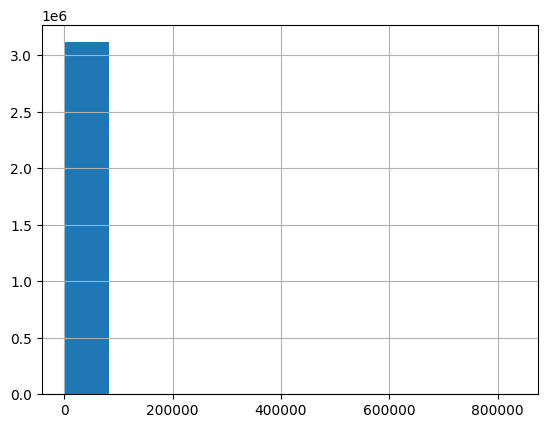

In [ ]:
# #draw a histogram of ppfvl
city['ppfvl']. hist ()

The histogram shows an extremely skewed distribution. Nearly all values are concentrated close to zero, with a few larger values extending far to the right. This suggests that ppfvl has a highly right-skewed distribution with many small values and a few very large outliers.

In [ ]:
#turn damaegeszipcodes to string
city['damagedZipCode'] = city['damagedZipCode'].astype(str)

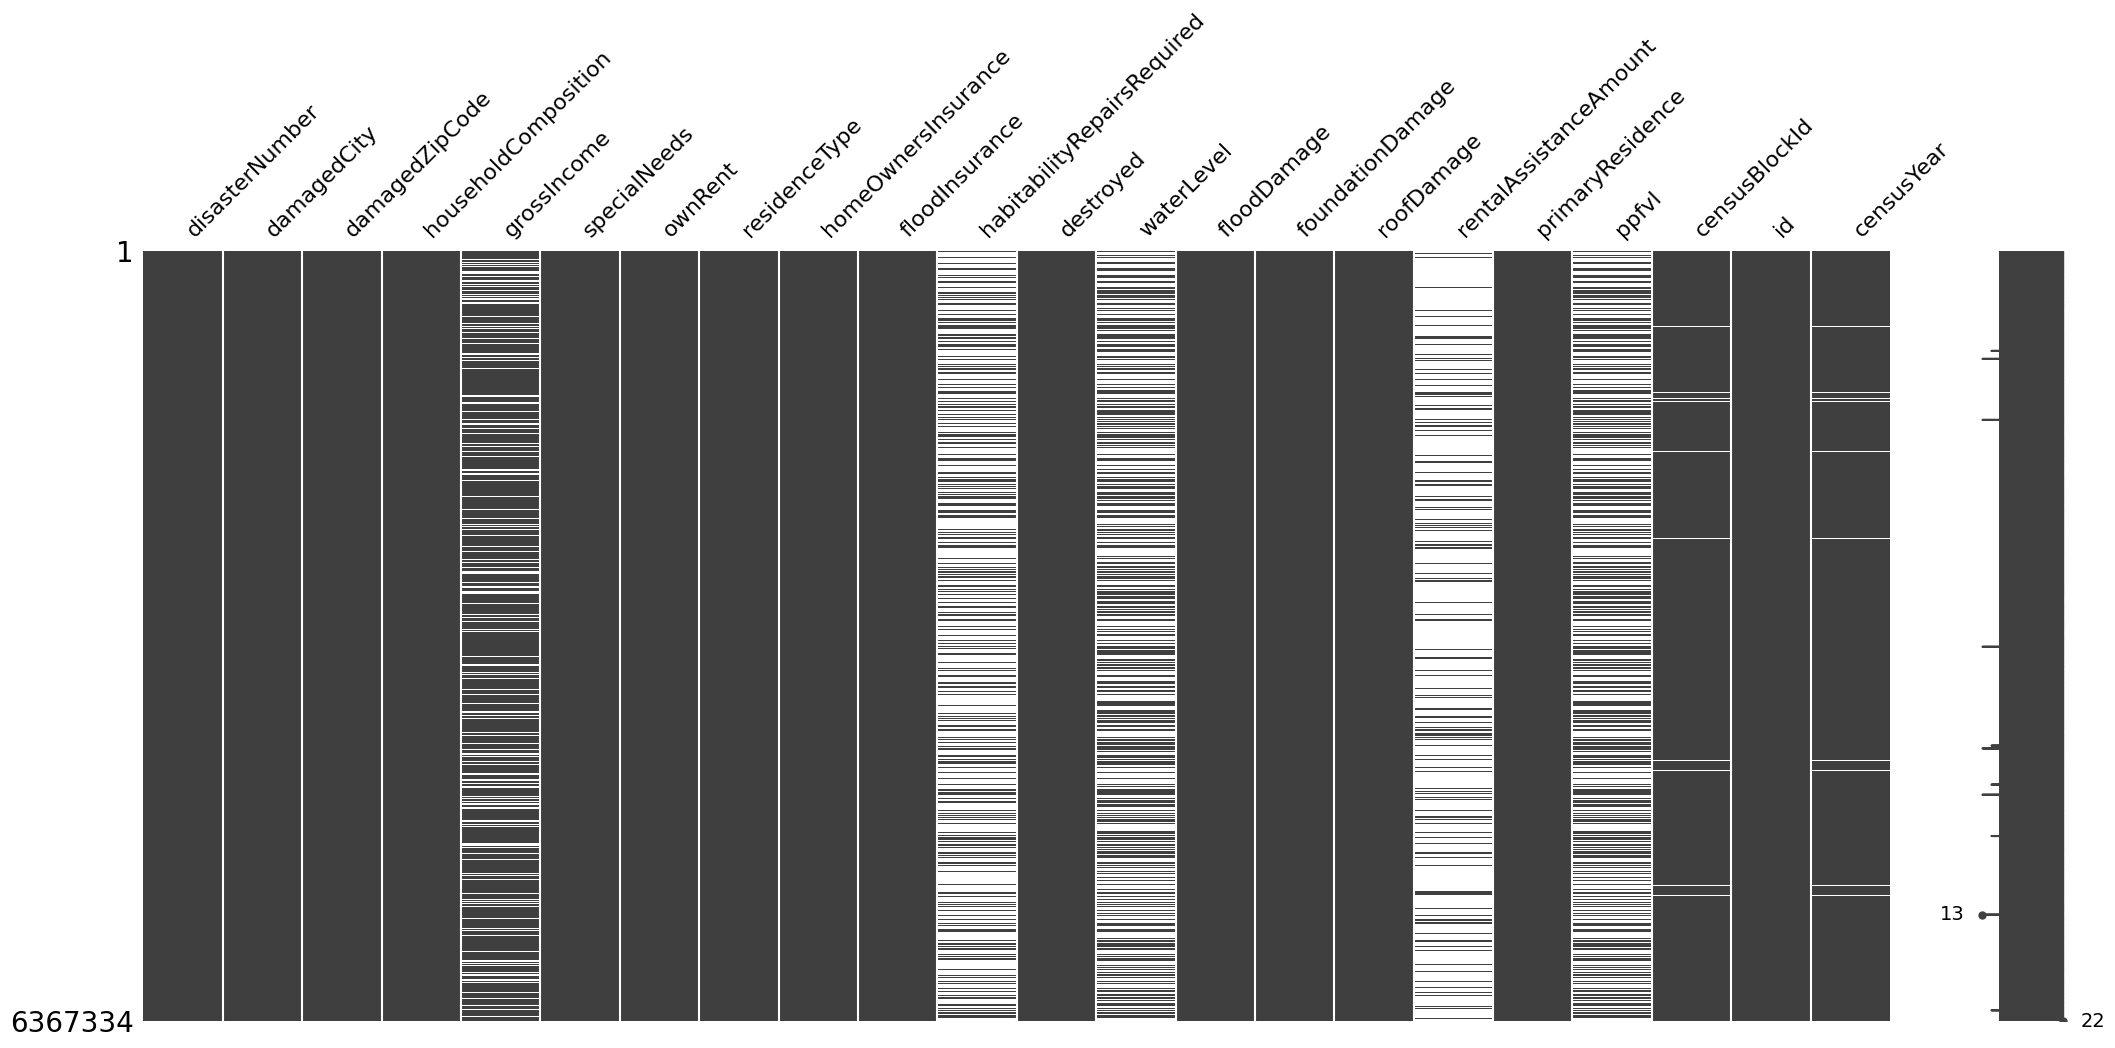

In [ ]:
#use msno fucntion for dataframe
import missingno as msno
msno.matrix(city)
plt.show()

The matrix shows that missing values are  distributed at random and scattered in PPFVL and gross income columns

In [ ]:
#nan values in ppfvl
city['grossIncome'].isna().sum()

1169713

<Axes: >

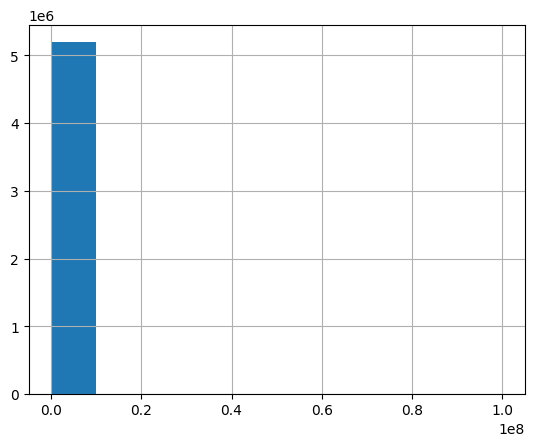

In [ ]:
# #histogram for gross income
city['grossIncome'].hist()

In [ ]:
#check for nan values
city['grossIncome'].isna().sum()

1169713

In [ ]:
# Step 1: Calculate the median of the 'ppfvl' column, ignoring NaNs
ppfvl_median = city['ppfvl'].median()
ppfvl_median

0.0

In [ ]:
#show nan values in ppfvl
city ["ppfvl"].isna().sum()

3252672

In [ ]:
city['ppfvl']. unique ()

array([    nan,    0.  ,  199.99, ..., 3135.38, 1617.  , 6140.81])

In [ ]:
# Step 1: Check data type
print(city['primaryResidence'].dtype)  # Should be int or float

float64


In [ ]:
# Step 2: Check for unique values to spot any unexpected values
print(city['primaryResidence'].unique())

[ 1.  0. nan]


In [ ]:
#count of all unique values
city['primaryResidence'].value_counts()

,count
primaryResidence,
1.0,6157792
0.0,209252


In [ ]:
# Drop rows where 'primaryResidence' is NaN across the entire DataFrame
city = city.dropna(subset=['primaryResidence'])

# Confirm the missing values have been dropped
print(city['primaryResidence'].isna().sum())  # Should output 0
print(city.shape)  # Check the new shape of the DataFrame

0
(6367044, 22)


These NaN values don't serve any purpose for our data.

In [ ]:
# Step 2: Check for unique values to spot any unexpected values
print(city['primaryResidence'].unique())

[1 0]


In [ ]:
# Step 5: Convert to integer type, if currently float
city['primaryResidence'] = city['primaryResidence'].astype(int)

In [ ]:
print(city['primaryResidence'].isna().sum())  # Should be 0
print(city['primaryResidence'].dtype)         # Should be int

0
int64


In [ ]:
city

In [ ]:
#Drop columns not relevant to analysis
city_revised = city.drop(columns=['waterLevel', 'floodDamage', 'foundationDamage','censusBlockId', 'censusYear', 'id', 'habitabilityRepairsRequired', 'destroyed',  'roofDamage', 'rentalAssistanceAmount', 'primaryResidence'])

# Print the available columns to double-check
print(city.columns)

Index(['disasterNumber', 'damagedCity', 'damagedZipCode',
       'householdComposition', 'grossIncome', 'specialNeeds', 'ownRent',
       'residenceType', 'homeOwnersInsurance', 'floodInsurance',
       'habitabilityRepairsRequired', 'destroyed', 'waterLevel', 'floodDamage',
       'foundationDamage', 'roofDamage', 'rentalAssistanceAmount',
       'primaryResidence', 'ppfvl', 'censusBlockId', 'id', 'censusYear'],
      dtype='object')


In [ ]:
#show dataframe
city_revised

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,ppfvl
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,NaN
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,NaN
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,0.00
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,199.99
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6367329,4339,TOA ALTA,953.0,4,13000.0,0,Owner,House/Duplex,0,0,6140.81
6367330,4339,SAN JUAN,926.0,2,56000.0,0,Owner,House/Duplex,1,0,NaN
6367331,4586,AUSTIN,78759.0,1,35800.0,0,Renter,Apartment,0,0,357.94
6367332,4611,KENNER,70062.0,2,120000.0,0,Owner,House/Duplex,1,1,NaN


In [ ]:
#Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')
city_revised.to_csv('/content/drive/My Drive/city_revised.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#create copy
city_imputed = city_revised.copy()